### Задание
Найти окружность, сумма квадратов расстояний от которой до заданных точек минимальна, а центр лежит на заданной кривой. Точность 10−8. Изобразить на плоскости заданные кривую и точки, а также найденную окружность и ее центр.

Кривая задана уравнением \
$ y - (x - 3)^2 + 16 = 0 $.

Очевидно, это уравнение параболы с центром в точке $ (3, -16) $. Выразим $ y $: \
$ y = (x - 3)^2 - 16 $

### Импорты

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

In [2]:
logger = logging.getLogger()
logger.setLevel(10)

### Решение

In [3]:
# Заданные точки
DOTS = np.array(
    [
        [10.3, 0.03], 
        [9.6, 2.45], 
        [8.69, 2.77], 
        [7.07, 3.35], 
        [6.05, 3.1], 
        [5.34, 1.79]
    ]
)


def f(x: np.ndarray) -> np.ndarray:
    return (x - 3) ** 2 - 16  # Полученное уравнение кривой

Для начала изобразим функцию на графике и найдем унимодальный отрезок.

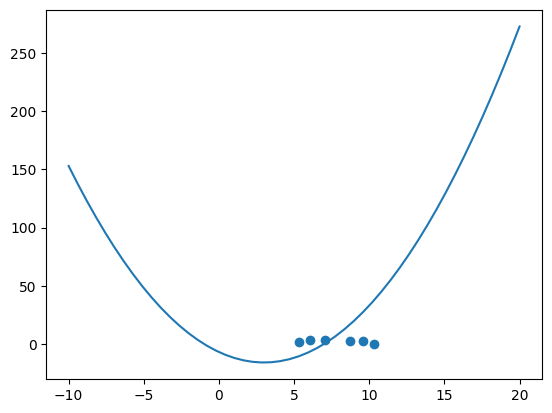

In [4]:
x = np.linspace(-10, 20)

plt.scatter(DOTS[:, 0], DOTS[:, 1])
plt.plot(x, f(x))
plt.show()

Сократим отрезок с $ [-10, 20] $ до $ [5, 11] $. Возьмем 500 точек. Выполним округление до двух знаков после запятой.\
Сразу же получим массив ординат на основе обновленного массива абсцисс. Также произведем округление.

In [5]:
X = np.linspace(start=5, stop=11, num=500).round(2)
Y = f(X).round(2)

print(f"{X[:5]}...")
print(f"{Y[:5]}...")

[5.   5.01 5.02 5.04 5.05]...
[-12.   -11.96 -11.92 -11.84 -11.8 ]...


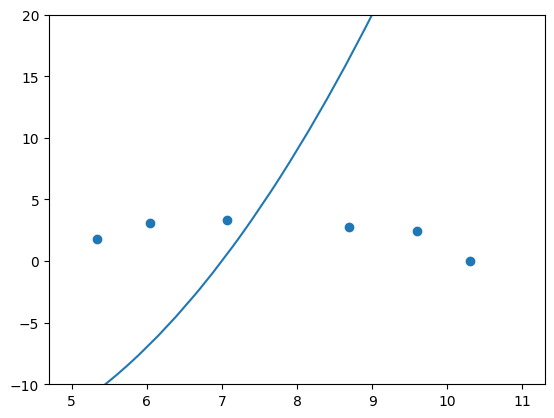

In [6]:
plt.scatter(DOTS[:, 0], DOTS[:, 1])
plt.plot(X, Y)
plt.ylim(-10, 20)
plt.show()

Вынесем расчет среднего радиуса в отдельную функцию.

In [39]:
def get_radius_mean_and_radiuses(
    initial_dot: tuple[float, float], other_dots: np.ndarray = DOTS
) -> tuple[float, np.ndarray]:
    x, y = initial_dot
    radiuses = np.array([])
    radius_sum = 0
    for x_dot, y_dot in other_dots:
        radius = np.sqrt((x_dot - x) ** 2 + (y_dot - y) ** 2)
        radius_sum += radius
        radiuses = np.append(radiuses, radius)
    rad_mean = round(radius_sum / len(other_dots), 2)
    radiuses = radiuses.round(2)
    return rad_mean, radiuses


def get_sq_sum_and_rad_mean(
    initial_dot: tuple[float, float], other_dots: np.ndarray=DOTS
) -> tuple[float, float]:
    _sq_sum = 0
    rad_mean, radiuses = get_radius_mean_and_radiuses(initial_dot, other_dots)
    for radius in radiuses:
        _sq_sum += (radius - rad_mean) ** 2
    return _sq_sum, rad_mean

Найдем эллипс с минимальным радиусом.

In [40]:
sq_sum_min = float("inf")
circle_min_radius = float("inf")
circle_min_dot = (0, 0)

sq_sums = np.array([])

for line_dot in zip(X, Y):
    sq_sum, rad_mean = get_sq_sum_and_rad_mean(initial_dot=line_dot)
    sq_sums = np.append(sq_sums, sq_sum)
    if sq_sum < sq_sum_min:
        sq_sum_min = sq_sum
        circle_min_radius = rad_mean
        circle_min_dot = line_dot

logger.info("Минимальный радиус эллипса %s", circle_min_radius)
logger.info("Центр эллипса в точке %s", circle_min_dot)

Выведем.

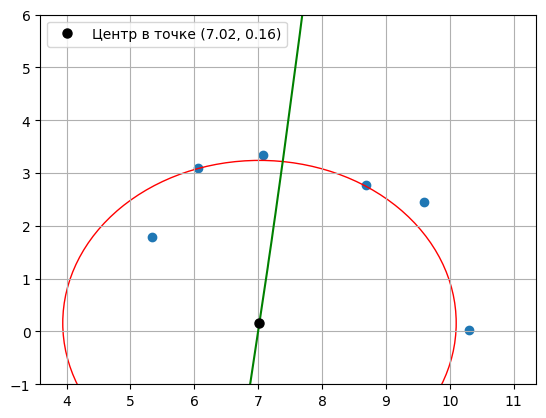

In [42]:
plt.ylim(-1, 6)
plt.grid()

plt.scatter(DOTS[:, 0], DOTS[:, 1])
plt.plot(X, Y, "g")
plt.plot(
    *circle_min_dot,
    "k.",
    markersize=13,
    label=f"Центр в точке {float(circle_min_dot[0]), float(circle_min_dot[1])}",
)
plt.gca().add_patch(Circle(circle_min_dot, circle_min_radius, fill=False, color="r"))

plt.legend()
plt.show()